## Importing Modules

In [25]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import scipy
import pylab as rcParams
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import scale
from sklearn import metrics
from sklearn import preprocessing
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif

In [3]:
churnData = pd.read_csv("churn_data.csv")

In [4]:
churnData.head()

,Unnamed: 0,ID,orderDate,title,newsletter,websiteDesign,paymentMethod,couponDiscount,purchaseValue,giftwrapping,...,dvd,blueray,vinyl,videogame,videogameDownload,tvEquiment,prodOthers,prodRemitted,prodSecondHand,returnCustomer
0,1,1,2014-12-23,Mr,0,2,Current Account,1,2,0,...,0,1,0,0,0,0,0,0,0,0
1,2,3,2014-09-10,Mr,0,1,Invoice,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,3,5,2014-08-30,Mr,0,1,Cash,0,4,0,...,0,0,1,0,0,0,0,0,0,0
3,4,7,2015-01-12,Mr,0,3,Cash,0,4,0,...,1,0,0,0,0,0,0,0,0,0
4,5,8,2014-09-26,Mr,0,3,Cash,0,4,0,...,2,0,0,0,0,0,0,0,0,0


## Logistic Regression for Churn Prevention

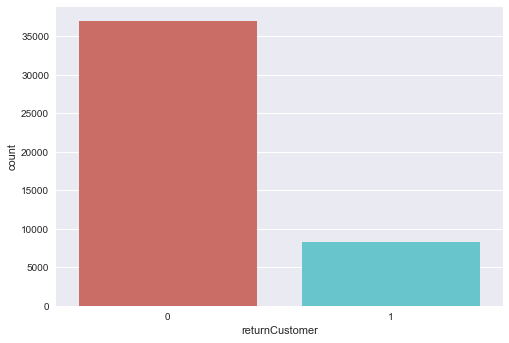

In [5]:
sns.countplot(x='returnCustomer', data= churnData, palette = 'hls')
plt.show()

###  Data Discovery
9000 customers return to shop

38000 did not return

In [15]:
churnVar1 = churnData[["newsletter","websiteDesign","tvEquiment"]].values
y = churnData['returnCustomer'].values

In [16]:
X = churnVar1

In [17]:
logistic_model = sm.GLM(y,X)
logitMod = logistic_model.fit()
print(logitMod.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                      y   No. Observations:                45236
Model:                            GLM   Df Residuals:                    45233
Model Family:                Gaussian   Df Model:                            2
Link Function:               identity   Scale:                  0.150760368794
Method:                          IRLS   Log-Likelihood:                -21391.
Date:                Thu, 31 Jan 2019   Deviance:                       6819.3
Time:                        10:29:42   Pearson chi2:                 6.82e+03
No. Iterations:                     2                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.1111      0.005     22.813      0.000       0.102       0.121
x2             0.0841      0.001     79.197      0.0

In [19]:
print(logitMod.aic)

42787.814956


In [18]:
LogReg = LogisticRegression()

logit = LogReg.fit(X, y)
print(LogReg.score(X, y))

0.817136793704


In [32]:
y_pred = LogReg.predict(X)
from sklearn.metrics import classification_report

print(classification_report(y, y_pred))

             precision    recall  f1-score   support

          0       0.82      1.00      0.90     36964
          1       0.00      0.00      0.00      8272

avg / total       0.67      0.82      0.73     45236



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [29]:
X_1 = churnData[["newsletter","websiteDesign",
                 "couponDiscount","purchaseValue","giftwrapping","dvd","blueray",
                 "vinyl","videogame","videogameDownload","tvEquiment","prodOthers","prodRemitted",
                 "prodSecondHand","returnCustomer"]]

In [30]:
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X_1.values, i) for i in range(X_1.shape[1])]
vif["features"] = X_1.columns

In [31]:
vif.round(1)

,VIF Factor,features
0,1.2,newsletter
1,3.8,websiteDesign
2,1.2,couponDiscount
3,4.5,purchaseValue
4,1.0,giftwrapping
5,1.7,dvd
6,1.2,blueray
7,1.2,vinyl
8,1.0,videogame
9,1.1,videogameDownload


In [36]:
df = pd.read_csv("defaultData.csv",sep=";")

In [37]:
df.head()

,ID,limitBal,sex,education,marriage,age,pay1,pay2,pay3,pay4,...,billAmt4,billAmt5,billAmt6,payAmt1,payAmt2,payAmt3,payAmt4,payAmt5,payAmt6,PaymentDefault
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [39]:
X_ex = df[["PaymentDefault"]]
y_ex = df[["limitBal","sex","education","marriage","age","pay1","pay2","pay3","pay4","pay5",
              "pay6","billAmt1","billAmt2","payAmt3","payAmt4","payAmt5","payAmt6"]]
extended_model = sm.GLM(X_ex, y_ex, family=sm.families.Binomial())
extendfit = extended_model.fit()
print(extendfit.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:         PaymentDefault   No. Observations:                18000
Model:                            GLM   Df Residuals:                    17983
Model Family:                Binomial   Df Model:                           16
Link Function:                  logit   Scale:                             1.0
Method:                          IRLS   Log-Likelihood:                -8652.8
Date:                Thu, 31 Jan 2019   Deviance:                       17306.
Time:                        09:53:55   Pearson chi2:                 2.07e+04
No. Iterations:                     6                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
limitBal   -7.726e-07   1.93e-07     -4.004      0.000   -1.15e-06   -3.94e-07
sex           -0.1512      0.034     -4.490      0.0

In [40]:
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(y_ex.values, i) for i in range(y_ex.shape[1])]
vif["features"] = y_ex.columns

In [41]:
vif.round(1)

,VIF Factor,features
0,3.9,limitBal
1,8.9,sex
2,7.0,education
3,6.2,marriage
4,10.8,age
5,1.8,pay1
6,3.1,pay2
7,3.7,pay3
8,4.6,pay4
9,4.9,pay5
